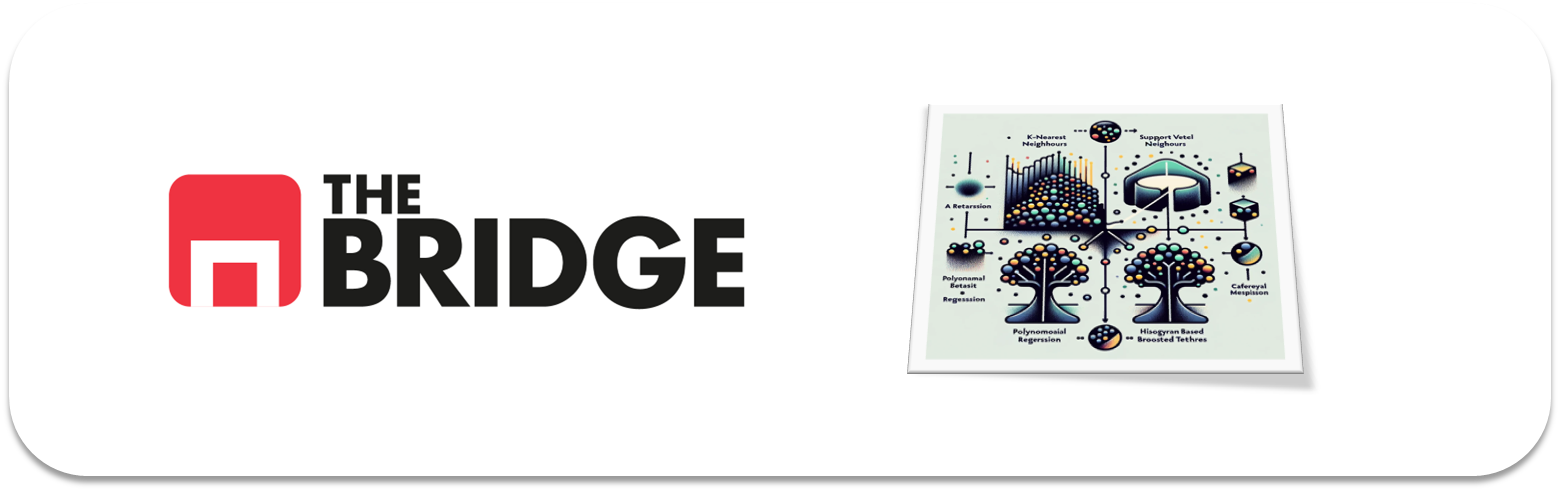

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import bootcampviztools as bt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

pd.options.mode.copy_on_write = True

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
target_clf = "quality"
target_reg = "alcohol"

##### Distribución del target para clasificación

In [6]:
df[target_clf].value_counts().sort_index()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

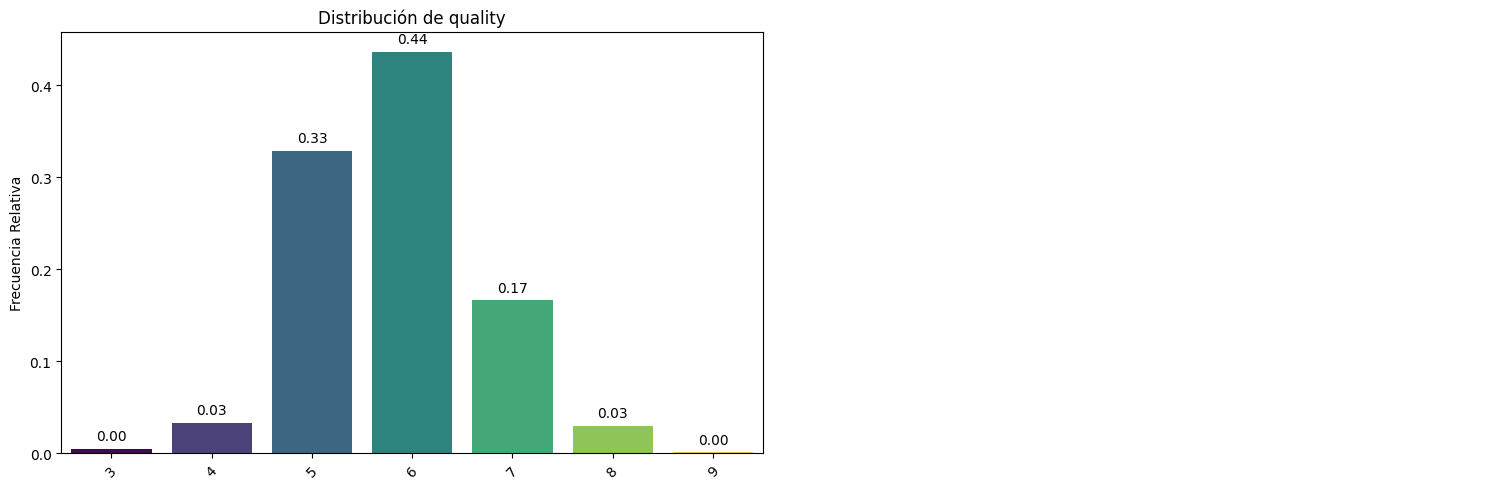

In [7]:
bt.pinta_distribucion_categoricas(df, columnas_categoricas= [target_clf], relativa= True, mostrar_valores= True)

Está bastante desbalanceada.

##### Distribución del target para regresión

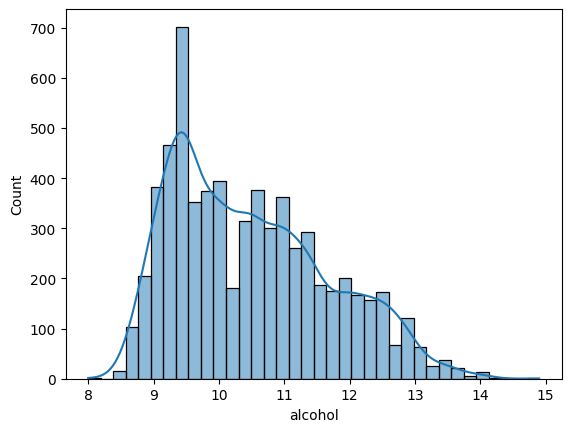

In [8]:
sns.histplot(df[target_reg], kde = True)
plt.show()

Mayor concentración entre el 9 y 11.5

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

##### **Split Train y Test**

In [9]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42, stratify= df[target_clf])

##### **Mini-EDA**

In [10]:
# Considero todas numéricas menos class
features_cat = ["class"]
features_num = [col for col in train_set.columns if col != target_clf and col != "class"]
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

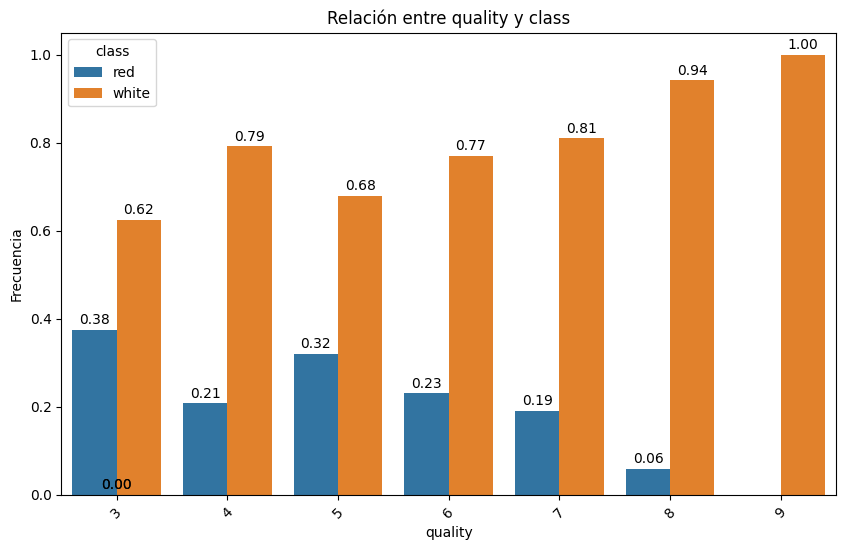

In [11]:
bt.plot_categorical_relationship_fin(train_set, target_clf, "class", relative_freq= True, show_values= True, size_group= 7)

Me la quedo como feature categórica.

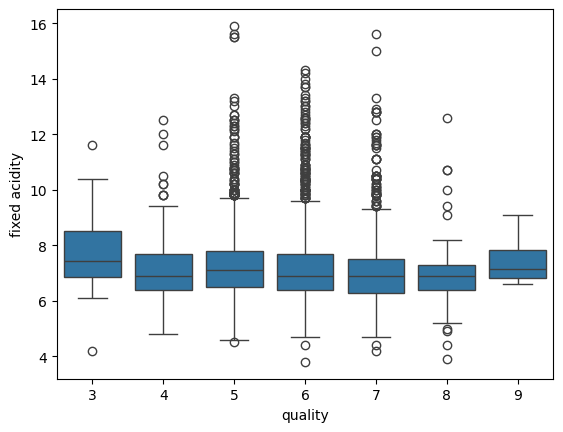

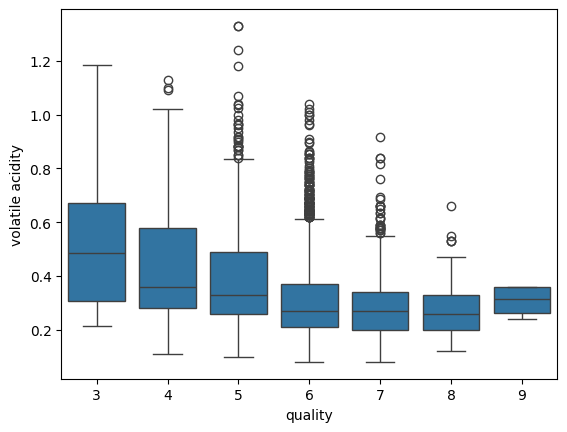

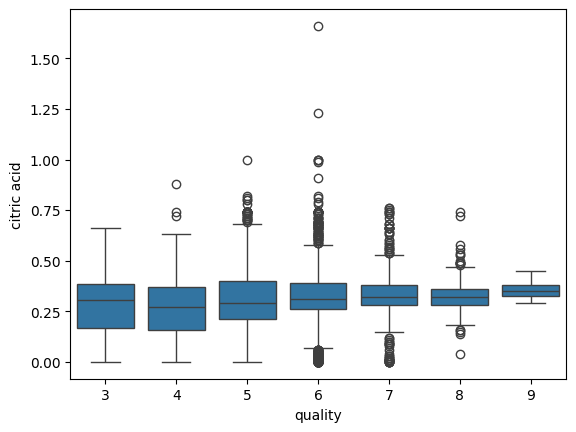

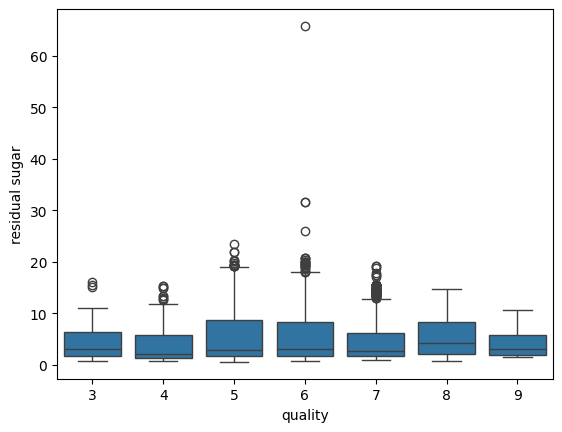

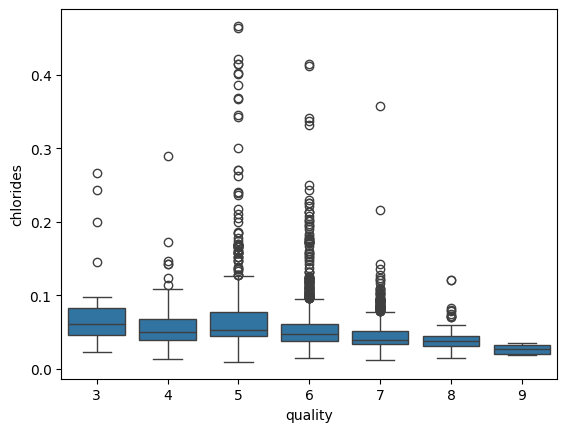

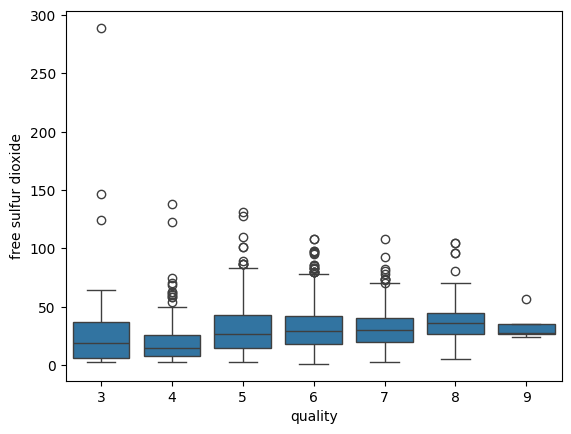

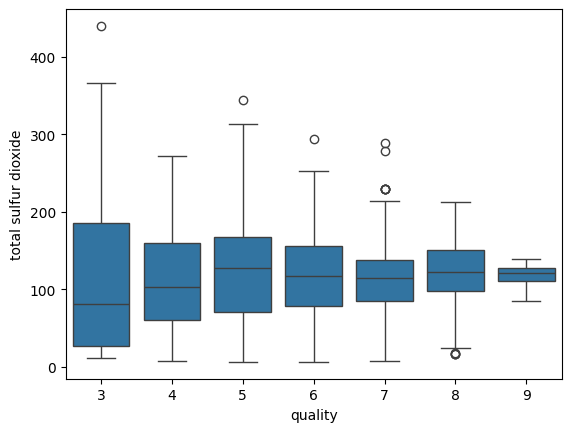

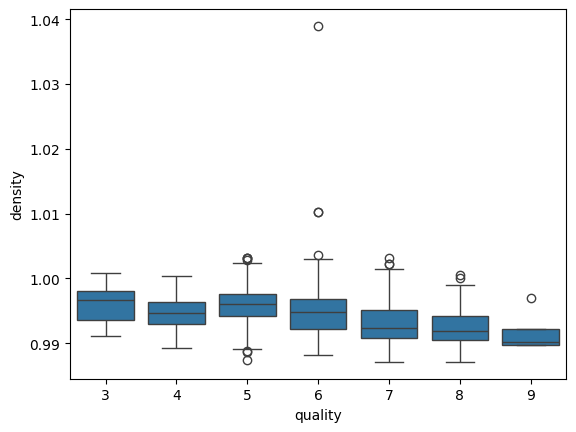

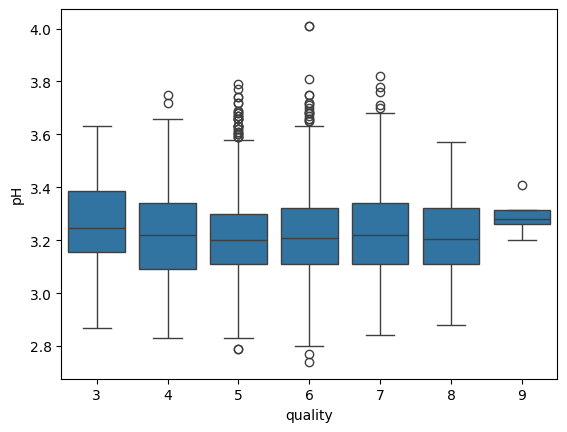

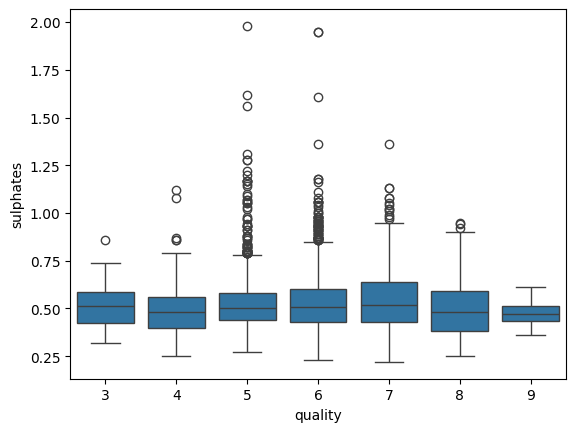

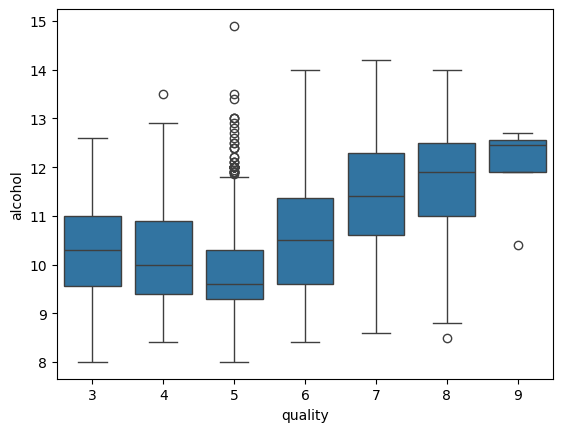

In [12]:
for col in features_num:
    sns.boxplot(data = train_set, x = target_clf, y = col)
    plt.show()

Hay alguna como 'sulphates' que a lo mejor podría discriminar, pero me voy a quedar todas.

In [13]:
features = features_cat + features_num
features

['class',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

##### **Tratamiento**

##### Numéricas

In [14]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

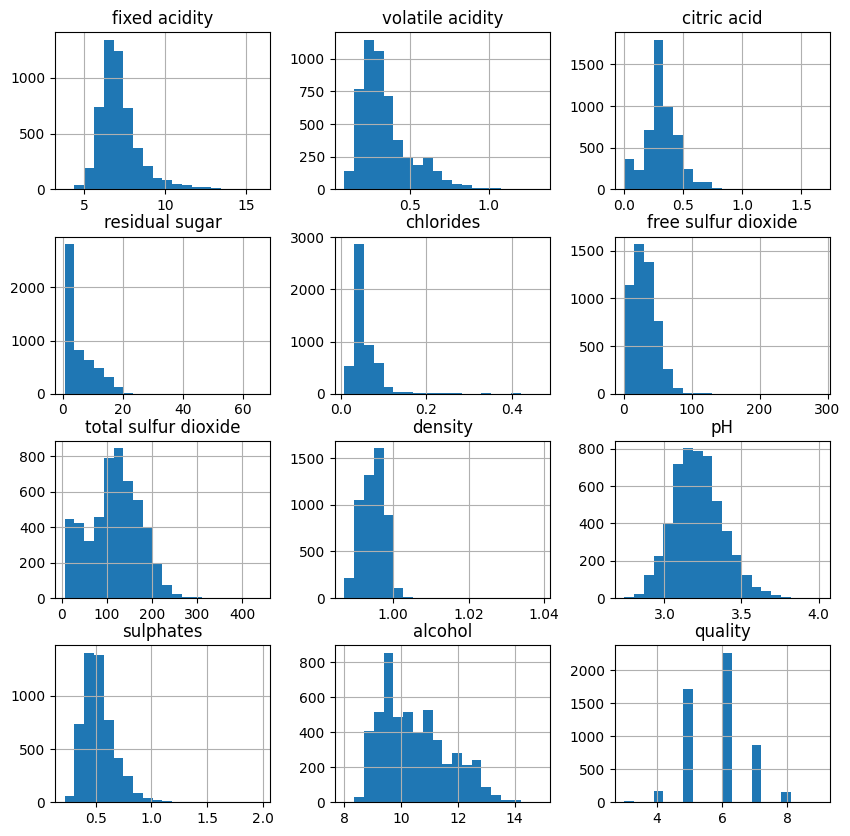

In [15]:
train_set.hist(figsize= (10, 10), bins = 20);

In [16]:
# a density y pH no le aplico el logaritmo

for col in features_num:
    if col not in ["citric acid", "density", "pH"]:
        train_set_scaled[col] = np.log(train_set_scaled[col])
        test_set_scaled[col] = np.log(test_set_scaled[col])

# citric acid
train_set_scaled["citric acid"] = np.log(train_set_scaled["citric acid"] + 1)
test_set_scaled["citric acid"] = np.log(test_set_scaled["citric acid"] + 1)

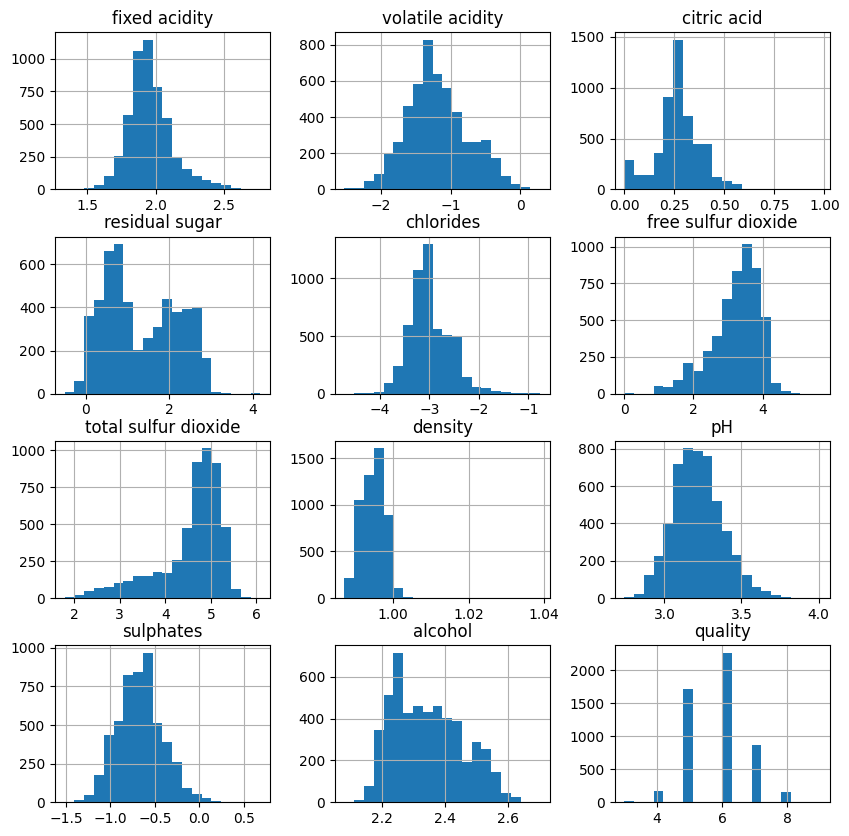

In [17]:
train_set_scaled.hist(figsize= (10, 10), bins = 20);

In [18]:
# Escalado
scaler = StandardScaler()

train_set_scaled[features_num] = scaler.fit_transform(train_set_scaled[features_num])
test_set_scaled[features_num] = scaler.transform(test_set_scaled[features_num])

In [19]:
train_set_scaled[features_num].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,1.830362e-15,3.623125e-16,-2.597713e-16,1.435578e-16,-8.008474e-16,-7.902515e-16,-1.852579e-16,-6.153844e-15,1.855314e-15,1.681677e-16,-1.781142e-15
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-3.812194e+00,-3.069194e+00,-2.455898e+00,-2.122089e+00,-4.006432e+00,-4.614646e+00,-3.900540e+00,-2.535681e+00,-2.998152e+00,-3.324677e+00,-2.380732e+00
25%,-6.490016e-01,-6.575655e-01,-4.988061e-01,-8.530909e-01,-6.524091e-01,-5.549721e-01,-3.140032e-01,-7.758709e-01,-6.773170e-01,-6.978475e-01,-8.290417e-01
50%,-1.052414e-01,-1.282176e-01,8.194973e-04,-2.630404e-01,-1.574390e-01,2.103075e-01,2.859146e-01,6.910382e-02,-5.006434e-02,-2.904360e-02,-9.900262e-02
75%,4.730939e-01,6.061587e-01,5.401203e-01,8.842567e-01,5.975848e-01,7.064821e-01,6.782502e-01,7.543983e-01,6.399136e-01,6.079848e-01,7.376432e-01
max,4.872941e+00,3.349865e+00,6.444950e+00,3.303892e+00,5.189445e+00,3.504701e+00,2.135492e+00,1.471977e+01,4.967957e+00,5.287824e+00,3.234777e+00


##### Categóricas

In [20]:
# Convierto con One-Hot Encoding para no dar más peso a una clase que a otra
train_set_scaled = pd.get_dummies(train_set_scaled, columns= features_cat, dtype= int)
train_set = pd.get_dummies(train_set, columns= features_cat, dtype= int)

test_set_scaled = pd.get_dummies(test_set_scaled, columns= features_cat, dtype= int)
test_set = pd.get_dummies(test_set, columns= features_cat, dtype= int)

##### **Parejas X e y**

In [21]:
X_train_scaled = train_set_scaled.drop(columns= target_clf, axis = 1)
X_train = train_set.drop(columns= target_clf, axis = 1)
y_train = train_set[target_clf]

X_test_scaled = test_set_scaled.drop(columns= target_clf, axis = 1)
X_test = test_set.drop(columns= target_clf, axis = 1)
y_test = test_set[target_clf]

##### **Baseline con KNN**

In [22]:
param_grid = {
    "n_neighbors": [3, 5, 7]
}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

knn_grid.fit(X_train_scaled, y_train)

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': [3, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate

In [23]:
knn_grid.best_params_

{'n_neighbors': 3}

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors= 3)
knn_clf.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [25]:
print(classification_report(y_train, knn_clf.predict(X_train_scaled)))

              precision    recall  f1-score   support

           3       0.56      0.58      0.57        24
           4       0.59      0.58      0.58       173
           5       0.79      0.83      0.81      1710
           6       0.80      0.82      0.81      2269
           7       0.80      0.71      0.76       863
           8       0.74      0.54      0.62       154
           9       0.00      0.00      0.00         4

    accuracy                           0.79      5197
   macro avg       0.61      0.58      0.59      5197
weighted avg       0.79      0.79      0.79      5197



c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

La clase 9 tiene muy pocos valores, de ahí que las métricas sean 0.

##### **Otros modelos y comparativa**

In [26]:
# # XGBoost: Expected: [0 1 2 3 4 5 6], got [3 4 5 6 7 8 9]
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test)

# xgb_clf = XGBClassifier(max_depth = 5, random_state = 42, n_classes = len(np.unique(y_train_encoded)))
# metrica = np.mean(cross_val_score(xgb_clf, X_train, y_train_encoded, cv = 5, scoring = "balanced_accuracy"))

# # Me da error

In [27]:
modelos = ["KNN","Logistic","RandomF","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)

for nombre, modelo in zip(modelos,[knn_clf, lr_clf, rf_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Para KNN: 0.2931095448931077
Para Logistic: 

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.2343653578299104
Para RandomF: 

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.21880707060515636
Para LightGBM: 

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.3368404604892971


El que mejor sale es LightGBM, pero sigue siendo malo --> equilibrado.

In [28]:
# Oversampling con SMOTE
smote = SMOTE(k_neighbors= 3, random_state= 42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_scaled, y_train_smote_scaled = smote.fit_resample(X_train_scaled, y_train)

In [29]:
y_train_smote.value_counts(normalize= True)

quality
5    0.142857
7    0.142857
6    0.142857
8    0.142857
3    0.142857
4    0.142857
9    0.142857
Name: proportion, dtype: float64

In [30]:
print(len(y_train))
print(len(y_train_smote))

5197
15883


In [31]:
modelos = ["KNN","Logistic","RandomF","LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, random_state = 42, verbose = -1, n_jobs= -1)
model = []

for nombre,modelo in zip(modelos,[knn_clf, lr_clf, rf_clf, lgb_clf]):
    model.append(modelo)
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train_smote, y_train_smote, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_smote_scaled, y_train_smote_scaled, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

Para KNN: 0.8623200063349434
Para Logistic: 0.5235220896422286
Para RandomF: 0.6243143743479245
Para LightGBM: 0.8348030124323265


Mejora bastante, sobre todo KNN y LightGBM.

##### **Ajuste de hiperparámetros del modelo ganador, LightGBM**

##### Sin SMOTE

In [37]:
param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight": ["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -1)

lgb_grid = GridSearchCV(lgb_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring= "balanced_accuracy",
                        n_jobs=-1)

lgb_grid.fit(X_train, y_train)

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMClassifier(verbose=-1)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': ['balanced', None], 'learning_rate': [0.1, 0.5, ...], 'max_depth': [5, 10, ...], 'min_data_in_leaf': [1, 10, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for

In [38]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 15,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [39]:
lgb_grid.best_score_

0.3907210499505882

In [40]:
print(classification_report(y_test, lgb_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.31      0.28      0.29        43
           5       0.67      0.70      0.68       428
           6       0.66      0.59      0.63       567
           7       0.52      0.66      0.58       216
           8       0.55      0.41      0.47        39
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1300
   macro avg       0.39      0.38      0.38      1300
weighted avg       0.62      0.62      0.62      1300



c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

##### Con SMOTE

In [41]:
param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100]
}

lgb_clf = LGBMClassifier(verbose = -1)

lgb_grid_smote = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=-1)

lgb_grid_smote.fit(X_train_smote,y_train_smote)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMClassifier(verbose=-1)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 0.5, ...], 'max_depth': [5, 10, ...], 'min_data_in_leaf': [1, 10, ...], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold an

In [42]:
lgb_grid_smote.best_params_

{'learning_rate': 0.5,
 'max_depth': 10,
 'min_data_in_leaf': 10,
 'n_estimators': 200}

In [43]:
lgb_grid_smote.best_score_

0.8881913041787011

In [44]:
print(classification_report(y_test, lgb_grid_smote.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.17      0.01         6
           4       0.00      0.00      0.00        43
           5       0.49      0.39      0.43       428
           6       0.47      0.29      0.36       567
           7       0.26      0.24      0.25       216
           8       0.09      0.21      0.12        39
           9       0.03      1.00      0.06         1

    accuracy                           0.30      1300
   macro avg       0.19      0.33      0.18      1300
weighted avg       0.41      0.30      0.35      1300



Sale mucho peor

##### **Análisis de errores**

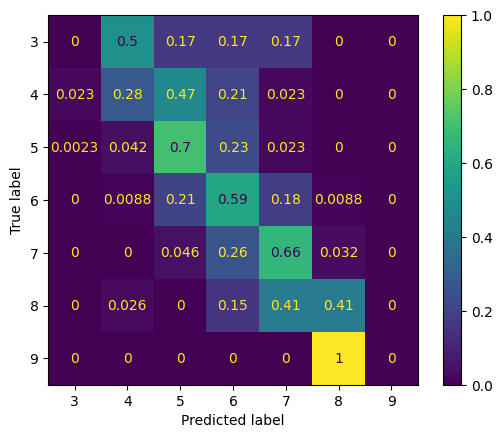

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_grid.best_estimator_.predict(X_test), normalize = "true")
plt.show()

- La clase 3 se predice como 4, 5 o 6.
- La clase 4 solo capta bien un 28%, se confunde con la 5, y algo con la 6.
- La clase 5 está bien de recall y se confunde con la 6.
- La clase 6 no está mal de recall, pero se confunde con la clase 5 y la 7.
- La clase 7 no está mal de recall y se confunde con la 6.
- La clase 8 se equivoca con la 7 y algo con la 6.
- La clase 9 la única instancia la equivoca con la 8.

Se podría intentar mejorar la diferencia entres las clases 5,6 y 7.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [47]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [46]:
train_set.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class_red', 'class_white'],
      dtype='object')

##### **Mini-EDA**

##### Numéricas

In [52]:
corr = train_set.corr(numeric_only = True)
corr[target_reg].sort_values(ascending = False)

alcohol                 1.000000
quality                 0.439689
pH                      0.113848
class_white             0.029479
citric acid            -0.004981
sulphates              -0.005453
class_red              -0.029479
volatile acidity       -0.043211
fixed acidity          -0.085195
free sulfur dioxide    -0.175778
chlorides              -0.260342
total sulfur dioxide   -0.265385
residual sugar         -0.361373
density                -0.683073
Name: alcohol, dtype: float64

In [53]:
corr_abs = np.abs(corr[target_reg]).sort_values(ascending = False)
corr_abs

alcohol                 1.000000
density                 0.683073
quality                 0.439689
residual sugar          0.361373
total sulfur dioxide    0.265385
chlorides               0.260342
free sulfur dioxide     0.175778
pH                      0.113848
fixed acidity           0.085195
volatile acidity        0.043211
class_red               0.029479
class_white             0.029479
sulphates               0.005453
citric acid             0.004981
Name: alcohol, dtype: float64

In [57]:
# quality, class_red y class_white en realidad son categóricas
features_num = corr_abs[corr_abs > 0.1].index.to_list()

In [58]:
# Quito quality y el target, las otras dos ya se han descartado al poner el criterio de corr > 0.1
features_num.remove(target_reg)
features_num.remove(target_clf)

In [59]:
features_num

['density',
 'residual sugar',
 'total sulfur dioxide',
 'chlorides',
 'free sulfur dioxide',
 'pH']

<Axes: >

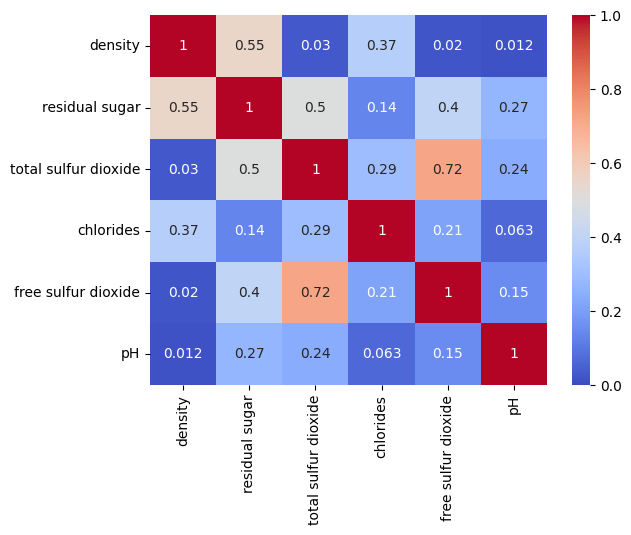

In [66]:
sns.heatmap(np.abs(train_set[features_num].corr(numeric_only = True)), annot = True, cmap = "coolwarm", vmin=0, vmax=1)

Claramente las variables de dióxido de azufre están fuertemente relacionadas

##### Categóricas

In [ ]:
features_cat = ["class_white", "class_red", target_clf]

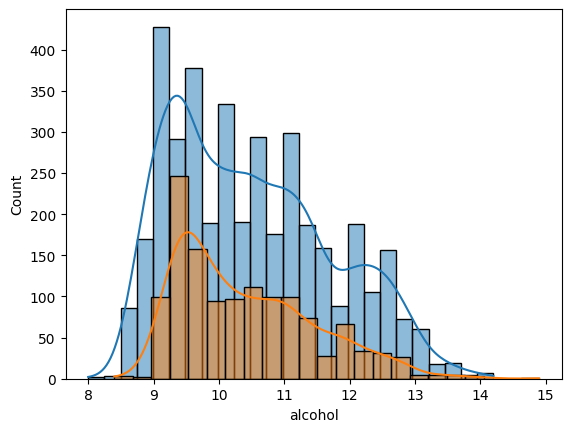

In [73]:
sns.histplot(x= target_reg, data = train_set[train_set["class_red"] == 0], kde = True)
sns.histplot(x= target_reg, data = train_set[train_set["class_red"] == 1], kde = True);

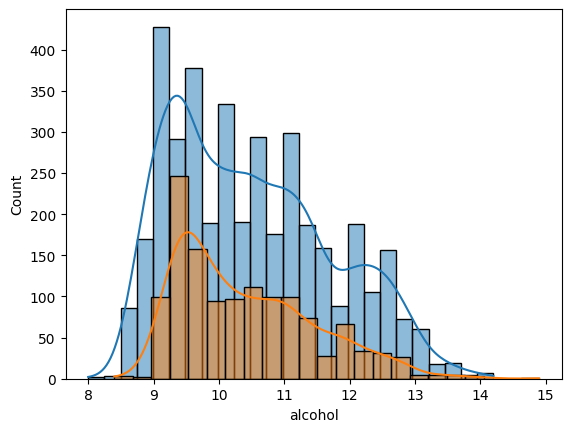

In [75]:
sns.histplot(x= target_reg, data = train_set[train_set["class_white"] == 1], kde = True)
sns.histplot(x= target_reg, data = train_set[train_set["class_white"] == 0], kde = True);

Alcohol y quality ya se ha estudiado en el problema de clasificación.

In [81]:
# Me quedo con todas las categóricas
features = features_num + features_cat
features

['density',
 'residual sugar',
 'total sulfur dioxide',
 'chlorides',
 'free sulfur dioxide',
 'pH',
 'class_white',
 'class_red',
 'quality']

##### **Tratamiento**

No hay que hacer ninguna transformación, ya están hechas.

##### **Parejas X e y**

In [83]:
# Las features cambian respecto al problema de clasificación
X_train = train_set[features]
X_train_scaled = train_set_scaled[features]
y_train = train_set[target_reg]

X_test = test_set[features]
X_test_scaled = test_set_scaled[features]
y_test = test_set[target_reg]

##### **Modelos y comparativa**

In [102]:
modelos = ["KNN", "DecisionTree","Random Forest","XGBoost","LightGBM"]

knn_reg = KNeighborsRegressor(n_neighbors = 3)
tree_reg = DecisionTreeRegressor(max_depth= 5, random_state= 42)
rf_reg = RandomForestRegressor(max_depth= 5, random_state= 42)
xgb_reg = XGBRegressor(max_depth = 5, random_state = 42)
lgb_reg = LGBMRegressor(random_state= 42, verbose = -100)

model_set = [knn_reg, tree_reg, rf_reg, xgb_reg, lgb_reg]

metricas_cv = {}
valores = []
for nombre,modelo in zip(modelos, model_set):
    if nombre == "KNN":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "neg_root_mean_squared_error")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "neg_root_mean_squared_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {-np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <KNN>, RMSE_CV: 0.63619740579754
Model <DecisionTree>, RMSE_CV: 0.6544480379371123
Model <Random Forest>, RMSE_CV: 0.5927616778827963
Model <XGBoost>, RMSE_CV: 0.5025414161466916
Model <LightGBM>, RMSE_CV: 0.4987545914929476
El ganador es LightGBM


El ganador es LightGBM, pero XGBoost es similar.

##### **Optimización**

Lo hago para LightGBM y XGBoost porque no hay mucha diferencia de RMSE.

In [103]:
param_grid_lgb = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100]
}

lgb_reg = LGBMRegressor(verbose = -1)

lgb_grid = GridSearchCV(lgb_reg,
                        param_grid= param_grid_lgb,
                        cv = 5,
                        scoring= "neg_root_mean_squared_error",
                        n_jobs=-1)

lgb_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMRegressor(verbose=-1)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 0.5, ...], 'max_depth': [5, 10, ...], 'min_data_in_leaf': [1, 10, ...], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for eac

In [110]:
-lgb_grid.best_score_

0.48266879641526533

In [111]:
lgb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 15,
 'min_data_in_leaf': 10,
 'n_estimators': 200}

In [114]:
param_grid_xgb= {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "colsample_bytree": [0.5,1],
    "subsample": [0.3,0.6,1]
}

xgb_reg = XGBRegressor(verbose = -1)

xgb_grid = GridSearchCV(xgb_reg,
                        param_grid= param_grid_xgb,
                        cv = 5,
                        scoring= "neg_root_mean_squared_error",
                        n_jobs=-1)

xgb_grid.fit(X_train, y_train)

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:24:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.5, 1], 'learning_rate': [0.1, 0.5, ...], 'max_depth': [5, 10, ...], 'n_estimators': [100, 200], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time

In [116]:
-xgb_grid.best_score_

0.4762481092342371

In [117]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.6}

XGBoost ha salido ligeramente mejor pero por muy poco. Decido quedarme con LightGBM ya que la diferencia es muy pequeña y sin optimizar salió ligeramente mejor.

In [130]:
y_pred_train = lgb_grid.best_estimator_.predict(X_train)
print("MAE:", mean_absolute_error(y_train,y_pred_train))
print("RMSE:", root_mean_squared_error(y_train, y_pred_train))

MAE: 0.21662368258271414
RMSE: 0.2939836737872204


In [131]:
y_pred_test = lgb_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred_test))
print("RMSE:", root_mean_squared_error(y_test, y_pred_test))

MAE: 0.3577189638666864
RMSE: 0.4918060732048859


Hay cierto overfitting y apenas ha salido mejor que sin ajustar.

##### **Análisis de errores**

In [123]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

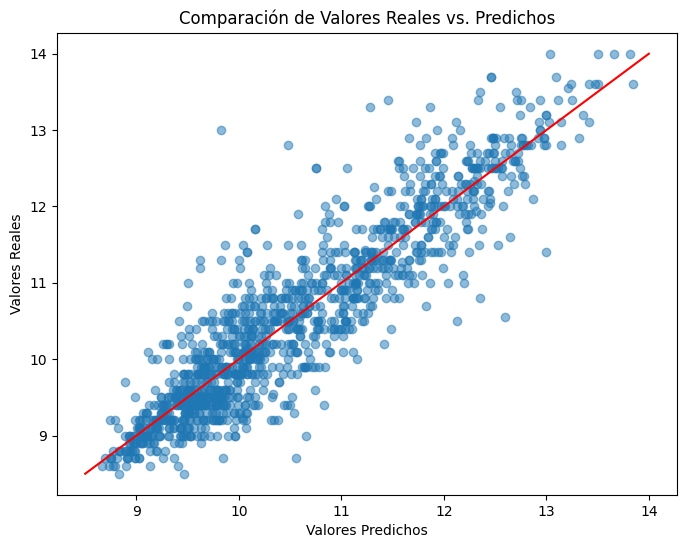

In [ ]:
plot_predictions_vs_actual(y_test, y_pred_test)

Errores más concentrados en alcohol más bajo.

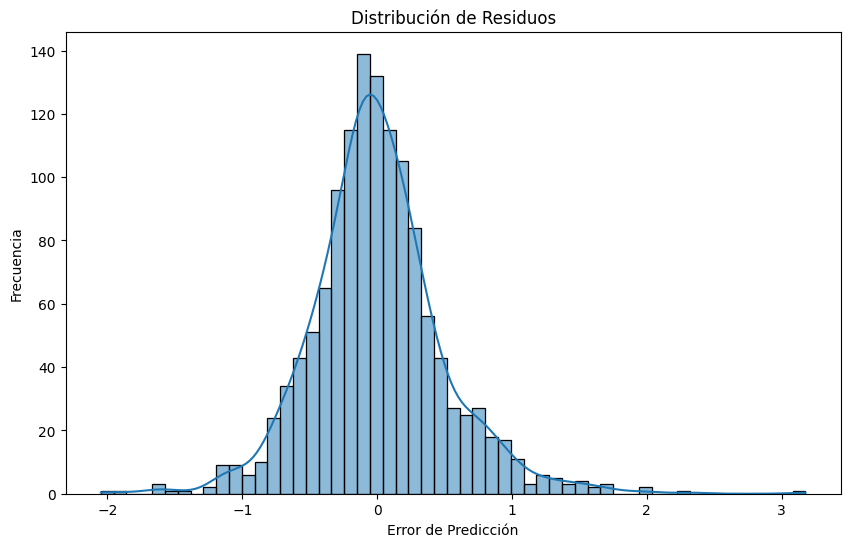

In [ ]:
# Calcular residuos
residuos = y_test - y_pred_test

# Visualización de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

Los errores siguen una distribución normal.

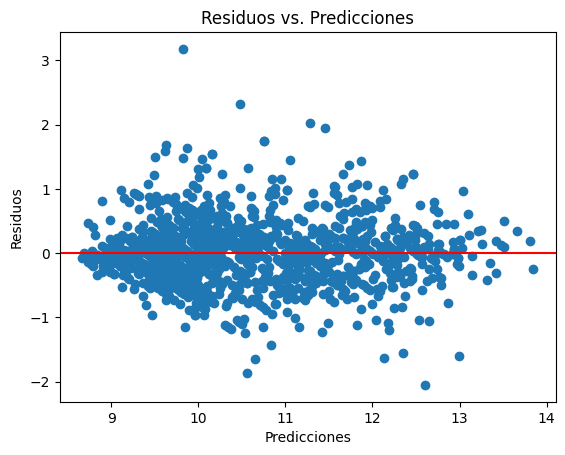

In [ ]:
# Gráfica de dispersión de residuos
plt.scatter(y_pred_test, residuos)
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()